## TrpR_IAA

Exemplary design of the trpytophane repressor (PDB: 1ZT9) with the ligand indole-3-acetic acid (IAA).

In [1]:
# This is a comment. It's marked by a leading "#" symbol

# Import OS and system libraries
import sys
import os
import logging

# Append the pocketoptimizer code to your $PYTHONPATH
cwd = os.getcwd()
po_dir = os.path.abspath(os.path.join(cwd, '..'))
project_dir = os.path.join(cwd, 'TrpR_IAA')
if not po_dir in sys.path:
    sys.path.insert(0, po_dir)

# Import Pocketoptimizer
import pocketoptimizer as po

# Remove most warnings, only show Errors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
# Initialize a new design pipeline
design = po.DesignPipeline(work_dir=project_dir,         # Path to working directory containing scaffold and ligand subdirectory
                           ph=7,                         # pH used for protein and ligand protonation
                           forcefield='amber_ff14SB',    # forcefield used for all energy computations (Use Amber as it is better tested!)
                           intra=False,                  # Whether to score intramolecular energies or not (Experimental, should be turned off!)
                           elec=0.01,                    # Scaling factor for electrostatic energies (1 %, you might want to increase that!)
                           ncpus=8)                      # Number of CPUs for multiprocessing

2022-10-25 15:11:55,877 - pocketoptimizer.ui - INFO - Logging to: /agh/projects/jakob/PycharmProjects/PocketOptimizer2/docs/tutorials/TrpR_IAA/pocketoptimizer.log


### From now on you are inside the directory of your design!

In [3]:
# Prepare ligand
design.parameterize_ligand(input_ligand='ligand/IAA.sdf',  # Input ligand structure file could be .mol2/.sdf
                           addHs=True                      # Whether to add hydrogen atoms to the input structure
                           )

2022-10-25 15:12:11,719 - numexpr.utils - INFO - Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-10-25 15:12:11,720 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
beignet-opencl-icd: no supported GPU found, this is probably the wrong opencl-icd package for this hardware
(If you have multiple ICDs installed and OpenCL works, you can ignore this message)
beignet-opencl-icd: no supported GPU found, this is probably the wrong opencl-icd package for this hardware
(If you have multiple ICDs installed and OpenCL works, you can ignore this message)
2022-10-25 15:12:12,345 - root - WARNING - Warning: importing 'simtk.openmm' is deprecated.  Import 'openmm' instead.
2022-10-25 15:12:12,838 - pocketoptimizer.preparation.structure_building - INFO - Adding hydrogen atoms to the ligand according to pH: 7.
2022-10-25 15:12:19,086 - pocketoptimizer.preparation.structure_building - INFO - Parameterize ligand for GAFF2.
2022-10-25 15:12:20

In [4]:
design.prepare_protein(
    protein_structure='scaffold/1ZT9.pdb',  # Input PDB
    keep_chains=['A', 'B'],  # Specific protein chains to keep
    minimize=True,           # Whether to minimize the input protein structure
    backbone_restraint=True, # Restrains the backbone during the minimization
    cuda=False,               # Performs minimization on CPU instead of GPU
    discard_mols=[{'chain': 'A', 'resid': '1001'}]     # Special molecules to exclude. Per default everything, but peptides have to be defined manually
    )

2022-10-25 15:12:29,819 - pocketoptimizer.ui - INFO - Start Protein Preparation.
2022-10-25 15:12:29,828 - pocketoptimizer.preparation.structure_building - INFO - Starting protein preparation.
2022-10-25 15:12:30,255 - pocketoptimizer.preparation.structure_building - INFO - Protonate protein according to pH: 7.
2022-10-25 15:12:30,446 - moleculekit.tools.preparation - WARNING - Both chains and segments are defined in Molecule.chain / Molecule.segid, however they are inconsistent. Protein preparation will use the chain information.



---- Molecule chain report ----
Chain A:
    First residue: SER     5  
    Final residue: LEU   105  
Chain B:
    First residue: SER     5  
    Final residue: TRP   901  
---- End of chain report ----



2022-10-25 15:12:32,435 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 A to HID
2022-10-25 15:12:32,436 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 A to HID
2022-10-25 15:12:32,437 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 B to HID
2022-10-25 15:12:32,437 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 B to HID
2022-10-25 15:12:32,438 - moleculekit.tools.preparation - WARNING - Dubious protonation state: the pKa of 2 residues is within 1.0 units of pH 7.0.
2022-10-25 15:12:32,439 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 A (pKa= 6.16)
2022-10-25 15:12:32,441 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 B (pKa= 6.24)
2022-10-25 15:12:33,218 - pocketoptimizer.preparation.structure_building - INFO - Successfully prepared protein structure.
2022-10-25 15:12:33,219 - pocketoptimizer.ui - INFO - Building complex.
2022-10-2

In [5]:
design.prepare_lig_conformers(
    nconfs=50,         # Maximum number of conformers to produce (Sometimes these methods produce lower number of conformations)
    method='genetic',  # Genetic method in OpenBabel, other option is confab
    score='rmsd',      # Filters conformers based on RMSD
    )

2022-10-25 15:13:05,238 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Starting ligand conformer generation using obabel.
2022-10-25 15:13:05,239 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Selected Method: genetic.
2022-10-25 15:13:05,862 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Generated 50 conformers.
2022-10-25 15:13:05,865 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Conformer sampling was successful.


In [6]:
# Your mutations
design.set_mutations([{'mutations': ['LEU', 'THR'], 'resid': '88', 'chain': 'B'}, 
                      {'mutations': ['ARG'], 'resid': '84', 'chain': 'B'}, 
                      {'mutations': ['LEU','THR'], 'resid': '44', 'chain': 'A'}]
)

2022-10-25 15:13:05,877 - pocketoptimizer.ui - INFO - If design positions are removed or added a new design run should be started.


In [7]:
# Prepares all defined mutants and glycine scaffolds for side chain rotamer and ligand pose sampling
design.prepare_mutants(sampling_pocket='GLY')

2022-10-25 15:13:06,425 - pocketoptimizer.ui - INFO - Start building mutated protein scaffold variants.
2022-10-25 15:13:06,426 - pocketoptimizer.ui - INFO - Build GLY sampling pockets.
2022-10-25 15:13:07,004 - pocketoptimizer.preparation.structure_building - INFO - Build ligand sampling pocket.
2022-10-25 15:13:07,556 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2022-10-25 15:13:07,751 - pocketoptimizer.preparation.structure_building - INFO - Starting the build.
2022-10-25 15:13:08,055 - pocketoptimizer.preparation.structure_building - INFO - Finished building.
2022-10-25 15:13:09,627 - pocketoptimizer.preparation.structure_building - INFO - Build mutation: A_44_LEU.
2022-10-25 15:13:10,177 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2022-10-25 15:13:10,401 - pocketoptimizer.preparation.structure_building - INFO - Starting the build.
2022-10-25 15:13:10,688 - pocketoptimizer.preparation.structure_building - INFO - Finished building.
2022-10-25 15:13:12,219 - 

In [8]:
# Sampling of side chain rotamers
design.sample_sidechain_rotamers(
    vdw_filter_thresh=100,         # Energy threshold of 100 kcal/mol for filtering rotamers
    library='dunbrack',            # Use dunbrack rotamer library (Should be used!)
    dunbrack_filter_thresh=0.001,  # Probability threshold for filtering rotamers (0.1%)
    accurate=False,                # Increases the number of rotamers sampled when using dunbrack (Be careful about the computation time!)
    include_native=True            # Include the native rotamers from the minimized structure
)

2022-10-25 15:13:46,256 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Start rotamer sampling procedure using FFEvaluate.
2022-10-25 15:13:46,257 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Using 8 CPU's for multiprocessing.
2022-10-25 15:13:47,075 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: A_44_LEU not sampled yet.


A_44_LEU:   0%|          | 0/64 [00:00<?, ?it/s]

2022-10-25 15:14:04,713 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 25/64 rotamers within energy threshold of 100 kcal/mol for LEU at position: A_44.
2022-10-25 15:14:04,732 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: A_44_THR not sampled yet.


A_44_THR:   0%|          | 0/10 [00:00<?, ?it/s]

2022-10-25 15:14:15,548 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 6/10 rotamers within energy threshold of 100 kcal/mol for THR at position: A_44.
2022-10-25 15:14:15,620 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_84_ARG not sampled yet.


B_84_ARG:   0%|          | 0/370 [00:00<?, ?it/s]

2022-10-25 15:15:27,866 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 324/370 rotamers within energy threshold of 100 kcal/mol for ARG at position: B_84.
2022-10-25 15:15:28,503 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_88_LEU not sampled yet.


B_88_LEU:   0%|          | 0/55 [00:00<?, ?it/s]

2022-10-25 15:15:46,541 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 21/55 rotamers within energy threshold of 100 kcal/mol for LEU at position: B_88.
2022-10-25 15:15:46,554 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_88_THR not sampled yet.


B_88_THR:   0%|          | 0/10 [00:00<?, ?it/s]

2022-10-25 15:15:56,336 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 6/10 rotamers within energy threshold of 100 kcal/mol for THR at position: B_88.
2022-10-25 15:15:56,360 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamer sampling procedure is finished.


In [9]:
# Sampling of ligand poses
# Defines a grid in which the ligand is translated and rotated along.
#                       Range, Steps
sample_grid = {'trans': [1, 0.5],  # Angstrom
               'rot': [20, 20]}    # Degree
design.sample_lig_poses(
    method='grid',         #  Uses the grid method. Other option is random
    grid=sample_grid,      #  Defined grid for sampling    
    vdw_filter_thresh=100, #  Energy threshold of 100 kcal/mol for filtering ligand poses
    max_poses=10000        #  Maximum number of poses
)

2022-10-25 15:15:56,457 - pocketoptimizer.ui - INFO - Sample ligand poses.
2022-10-25 15:15:56,458 - pocketoptimizer.sampling.ligand_poses - INFO - Start ligand pose sampling procedure.
2022-10-25 15:15:57,735 - pocketoptimizer.sampling.ligand_poses - INFO - Generate possible poses within the defined grid.


Ligand Conformers:   0%|          | 0/51 [00:00<?, ?it/s]

2022-10-25 15:15:57,813 - pocketoptimizer.sampling.ligand_poses - INFO - Created possible 4641 poses.
2022-10-25 15:15:57,814 - pocketoptimizer.sampling.ligand_poses - INFO - Start filtering poses.
2022-10-25 15:15:57,815 - pocketoptimizer.sampling.ligand_poses - INFO - Using 8 CPUs for multiprocessing.


Filter Poses:   0%|          | 0/4641 [00:00<?, ?it/s]

2022-10-25 15:26:37,159 - pocketoptimizer.sampling.ligand_poses - INFO - Calculated 1025 poses within energy threshold of 100 kcal/mol.
2022-10-25 15:26:41,452 - pocketoptimizer.sampling.ligand_poses - INFO - Pose sampling procedure was successful.


In [10]:
design.calculate_energies(
    scoring='vina',           #  Method to score protein-ligand interaction
)

2022-10-25 15:26:41,534 - pocketoptimizer.ui - INFO - Start energy calculations.
2022-10-25 15:26:41,535 - pocketoptimizer.ui - INFO - Using 8 CPUs for multiprocessing.
2022-10-25 15:26:41,535 - pocketoptimizer.ui - INFO - Calculate Sidechain-Scaffold Energies.
2022-10-25 15:26:41,536 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Compute energies using forcefield: amber_ff14SB.
2022-10-25 15:26:41,607 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: A_44_LEU not computed yet.


  0%|          | 0/25 [00:00<?, ?it/s]

2022-10-25 15:26:49,513 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: A_44_THR not computed yet.


  0%|          | 0/6 [00:00<?, ?it/s]

2022-10-25 15:26:57,068 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_84_ARG not computed yet.


  0%|          | 0/324 [00:00<?, ?it/s]

2022-10-25 15:27:13,754 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_88_LEU not computed yet.


  0%|          | 0/21 [00:00<?, ?it/s]

2022-10-25 15:27:21,274 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_88_THR not computed yet.


  0%|          | 0/6 [00:00<?, ?it/s]

2022-10-25 15:27:27,799 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self calculation was successful.
2022-10-25 15:27:27,801 - pocketoptimizer.ui - INFO - Calculate Sidechain-Pair Energies.
2022-10-25 15:27:27,802 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Compute energies using forcefield: amber_ff14SB.
2022-10-25 15:27:28,416 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_84_ARG not computed yet.


  0%|          | 0/8100 [00:00<?, ?it/s]

2022-10-25 15:27:38,921 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_84_ARG not computed yet.


  0%|          | 0/1944 [00:00<?, ?it/s]

2022-10-25 15:27:46,593 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_88_LEU not computed yet.


  0%|          | 0/525 [00:00<?, ?it/s]

2022-10-25 15:27:53,751 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_88_THR not computed yet.


  0%|          | 0/150 [00:00<?, ?it/s]

2022-10-25 15:28:01,113 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_88_LEU not computed yet.


  0%|          | 0/126 [00:00<?, ?it/s]

2022-10-25 15:28:08,133 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_88_THR not computed yet.


  0%|          | 0/36 [00:00<?, ?it/s]

2022-10-25 15:28:16,775 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: B_84_ARG/B_88_LEU not computed yet.


  0%|          | 0/6804 [00:00<?, ?it/s]

2022-10-25 15:28:26,896 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: B_84_ARG/B_88_THR not computed yet.


  0%|          | 0/1944 [00:00<?, ?it/s]

2022-10-25 15:28:34,346 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Pair calculation was successful.
2022-10-25 15:28:34,348 - pocketoptimizer.ui - INFO - Calculate Ligand-Scaffold/Sidechain-Interaction-Energies.
2022-10-25 15:28:34,366 - pocketoptimizer.scoring.smina_scorer - INFO - Score ligand interactions using vina.
2022-10-25 15:28:35,603 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Scaffold/Self interaction energy not computed yet.
2022-10-25 15:28:35,603 - pocketoptimizer.scoring.smina_scorer - INFO - Prepare fixed scaffold.


Ligand/Scaffold:   0%|          | 0/1 [00:00<?, ?it/s]

2022-10-25 15:28:39,525 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: A_44_LEU not computed yet.
2022-10-25 15:28:39,658 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: A_44_LEU.


Ligand/A_44_LEU:   0%|          | 0/25 [00:00<?, ?it/s]

2022-10-25 15:29:00,639 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: A_44_THR not computed yet.
2022-10-25 15:29:00,682 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: A_44_THR.


Ligand/A_44_THR:   0%|          | 0/6 [00:00<?, ?it/s]

2022-10-25 15:29:05,905 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_84_ARG not computed yet.
2022-10-25 15:29:06,719 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_84_ARG.


Ligand/B_84_ARG:   0%|          | 0/324 [00:00<?, ?it/s]

2022-10-25 15:33:40,521 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_88_LEU not computed yet.
2022-10-25 15:33:40,658 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_88_LEU.


Ligand/B_88_LEU:   0%|          | 0/21 [00:00<?, ?it/s]

2022-10-25 15:33:59,076 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_88_THR not computed yet.
2022-10-25 15:33:59,122 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_88_THR.


Ligand/B_88_THR:   0%|          | 0/6 [00:00<?, ?it/s]

2022-10-25 15:34:04,232 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand scoring was successful.
2022-10-25 15:34:04,233 - pocketoptimizer.ui - INFO - Energy calculation was successful.


2022-10-25 15:41:10,305 - pocketoptimizer.solving.sontag_solver - INFO - Calculating Solutions.


Solutions:   0%|          | 0/10 [00:00<?, ?it/s]

2022-10-25 15:41:40,332 - pocketoptimizer.ui - INFO - Parse calculated solutions.
2022-10-25 15:41:40,734 - pocketoptimizer.ui - INFO - Read 10 solution(s) from solver output.
2022-10-25 15:41:44,957 - pocketoptimizer.ui - INFO - Write text report.
2022-10-25 15:41:45,036 - pocketoptimizer.ui - INFO - Wrote solution report text file(s).
2022-10-25 15:41:45,039 - pocketoptimizer.ui - INFO - Wrote summary text file.
2022-10-25 15:41:45,039 - pocketoptimizer.ui - INFO - Write html report.
2022-10-25 15:41:45,130 - pocketoptimizer.ui - INFO - Wrote solution report html file(s).
2022-10-25 15:41:45,132 - pocketoptimizer.design.html_reporter - INFO - Create energy plot.
2022-10-25 15:41:45,730 - pocketoptimizer.design.html_reporter - INFO - Create sequence logo for mutable positions.


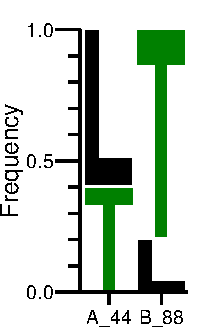

2022-10-25 15:41:47,260 - pocketoptimizer.ui - INFO - Wrote summary html file.
2022-10-25 15:41:47,261 - pocketoptimizer.ui - INFO - Creating design structure files.
2022-10-25 15:41:47,262 - pocketoptimizer.ui - INFO - Create Structures.
2022-10-25 15:41:56,181 - pocketoptimizer.ui - INFO - Creating PyMol scripts.
2022-10-25 15:41:56,241 - pocketoptimizer.ui - INFO - 10 best design solution(s) for design with forcefield: amber_ff14SB, scoring method: vina and ligand scaling: 5 identified.


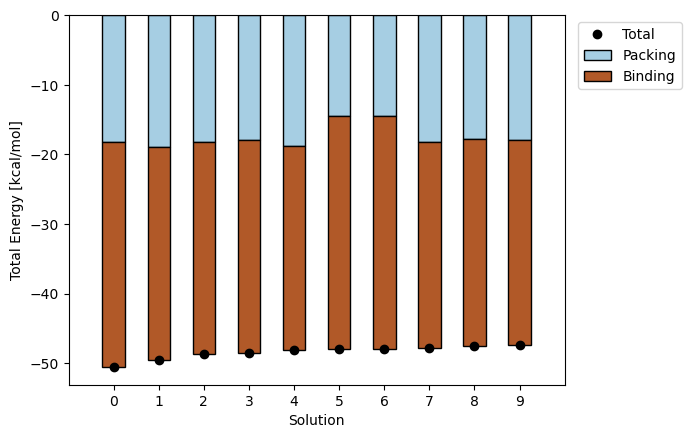

In [12]:
# Compute the lowest energy structures using linear programming
design.design(
    num_solutions=10,           #  Number of solutions to compute
    ligand_scaling=5,           #  Scaling factor for binding-related energies (You need to adapt this to approximate the packing and binding energies)
)

In [3]:
# Do not run this unless you want to fully clean your working directory from all created files and folders!
design.clean(scaffold=True, ligand=True)

2022-10-25 15:11:45,089 - pocketoptimizer.ui - INFO - All scaffold files are deleted.
2022-10-25 15:11:46,068 - pocketoptimizer.ui - INFO - All ligand files are deleted.
2022-10-25 15:11:46,072 - pocketoptimizer.ui - INFO - Deleted log file.
2022-10-25 15:11:46,074 - pocketoptimizer.ui - INFO - All files were deleted.
2022-10-25 15:11:46,076 - pocketoptimizer.ui - INFO - Initialize a new DesignPipeline.
